In [1]:
import traj_dist.distance as tdist #to compile distances
import pyclustering as cl #to cluster the distances
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
import traja as tr #to work with trajectory data
import pandas as pd #to read csv file
import itertools #to compare all trajectories
import numpy as np
from matplotlib import pyplot as plt
import csv
from traja.frame import TrajaCollection #to use all trajectories at once
import seaborn as sns
import geopandas
import geoplot
from shapely.geometry import MultiLineString, LineString, Point, MultiPoint
import pickle

Generate Asia background map

<AxesSubplot:>

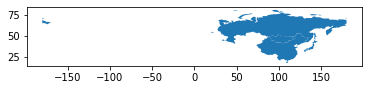

In [2]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
asia = world.cx[90:, 45:]#('continent == "Asia"')
asia.plot()

Code to read and visualize data from pickle output

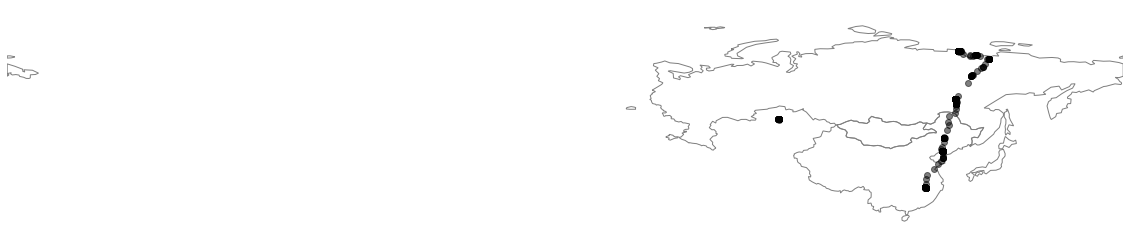

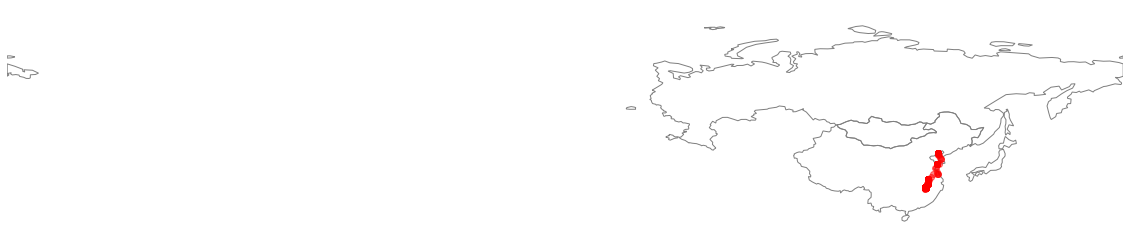

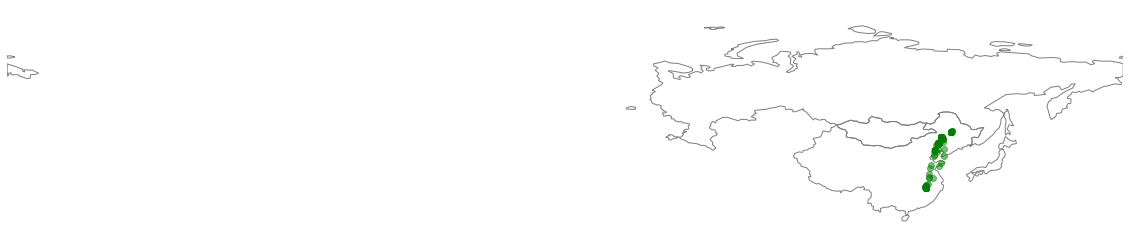

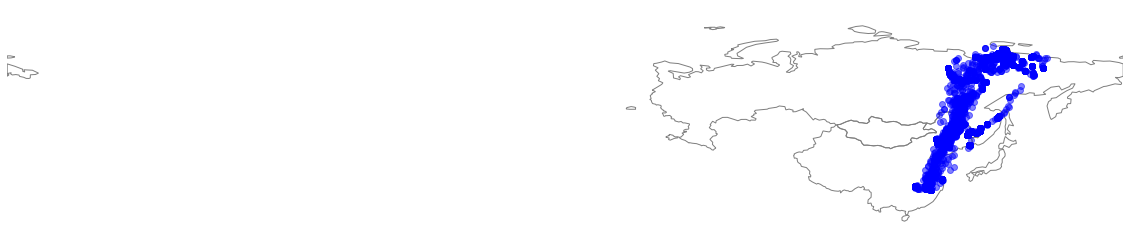

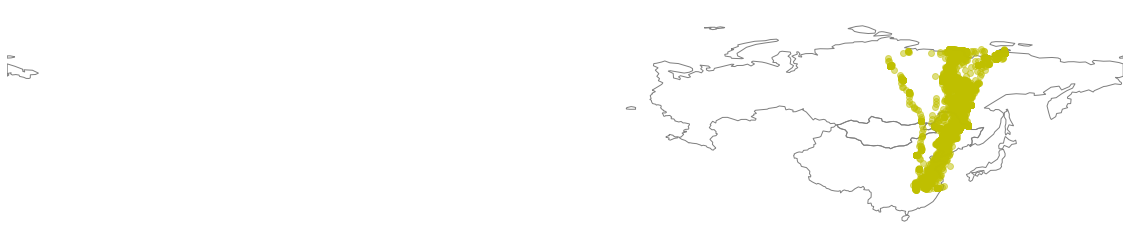

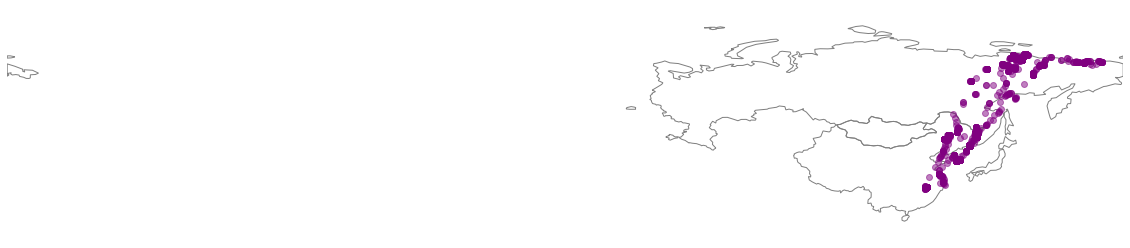

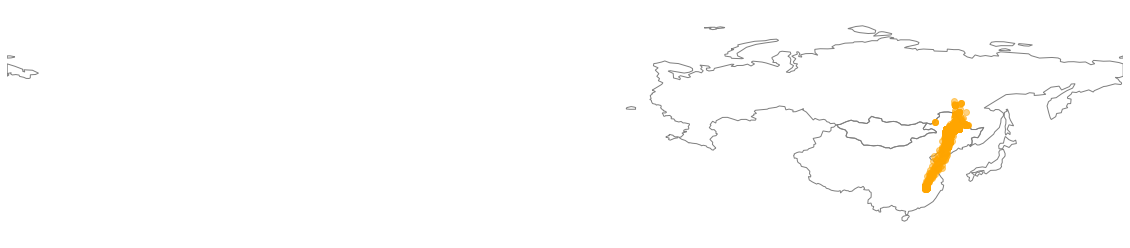

In [3]:
a_file = open("clustered_trj_resampled_20downsampled.pkl", "rb")
colour = ['k', 'r', 'g', 'b', 'y', 'purple', 'orange', 'pink']
colour_counter = 0
output = pickle.load(a_file)

for item in output:
    df_cluster = pd.DataFrame()
    for counter in range(len(item)):
        df = pd.DataFrame(output[item][counter], columns = ['Long', 'Lat'])  
        df_cluster = df_cluster.append(df)
    gdf = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(x=df_cluster.Long, y=df_cluster.Lat))
    ax = gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor=colour[colour_counter], color= colour[colour_counter])
    figure_name = "SSPD_cluster_resampled_downsampled{}.png".format(colour_counter)
    fig = geoplot.polyplot(asia, edgecolor='gray', ax=ax).get_figure()
    fig.savefig(figure_name)
    colour_counter = colour_counter +1

Code to compare two pickle files

In [4]:
def distance(alist, blist):
    sum_of = 0
    for x, y in zip(alist, blist):
        for item_X, item_y in zip(x,y):
            ans = (item_X[0] - item_y[0])**2 + (item_X[1] - item_y[1])**2
            sum_of += ans
        return (sum_of)**(1/2)

In [9]:
normal = open("clustered_trj_resampled_nodownsampled.pkl", "rb")
downsampled  = open("clustered_trj_resampled_downsampled.pkl", "rb")
normal_df = pickle.load(normal)
downsampled_df = pickle.load(downsampled)
dist = 0
for key_normal, key_downsampled in zip(normal_df, downsampled_df):
    #print(normal_df[key_normal])
    #print(downsampled_df[key_downsampled])
    dist += distance(normal_df[key_normal], downsampled_df[key_downsampled])
print(dist)

3777.1876042659414


code to read data from clustered_trj.csv

In [3]:
#clustered_trj.csv = 80, no downsampling, no resampling
with open('clustered_trj.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

print(type(data))
list_of_lists = []
new_list = []
long_lang = []
#for i in range(len(data)):
#    print(len(data[i]))
for i in range(len(data)):
    for j in range(len(data[i])): 
        if data[i][j] !=" ":
            if (data[i][j].endswith(']')):
                long_lang.append(float(data[i][j][:-1]))
                new_list.append(long_lang)
                long_lang = []
            elif (data[i][j].startswith('(')):
                long_lang.append(float(data[i][j][4:]))
            elif (data[i][j].endswith(']]\'')):
                long_lang.append(float(data[i][j][:-3]))
                new_list.append(long_lang)
                long_lang = []
            elif (data[i][j].endswith(']]')):
                long_lang.append(float(data[i][j][:-2]))
                new_list.append(long_lang)
                long_lang = []
            elif (data[i][j].startswith(' [[')):
                long_lang.append(float(data[i][j][3:]))
            elif (data[i][j].startswith(' [')):
                long_lang.append(float(data[i][j][2:]))
    list_of_lists.append(new_list)
    new_list = []
    print(i)

#for row in data:
#    for item in row:
#        if item.endswith(']'):
#            item = item[:-1]
#        if item.startswith('['):
#            item = item[1:]

for i in range(len(list_of_lists)):
    print(len(list_of_lists[i]))

<class 'list'>
0
1
2
3
4
5
6
7
6382
180413
16635
496339
132109
249139
600311
23409


In [4]:
import folium
import mapclassify as mc

In [5]:
First_last = []
df_First_last = pd.DataFrame(columns = ['First', 'Last'])
for cluster in range(len(list_of_lists)):
    First_last.append(list_of_lists[cluster][0])
    First_last.append(list_of_lists[cluster][len(list_of_lists[cluster])-1])
    print(First_last)
    df_First_last.loc[len(df_First_last)] = First_last
    First_last = []
print(df_First_last)

[[120.62466979999999, 43.30617279999999], [116.29769879999999, 29.028198100000004]]
[[128.2846464, 49.5173214], [127.68883999999998, 50.31276]]
[[116.15766, 29.09931], [116.12016000000001, 29.14442]]
[[115.9332818, 29.1475343], [116.03854, 29.1165]]
[[68.90603349999999, 51.09891029999999], [116.30348000000001, 28.94]]
[[116.35151210000001, 29.040140299999997], [122.76279, 46.80921]]
[[116.37592020000001, 28.932817600000003], [116.29759890000001, 29.028284000000003]]
[[116.08316, 28.787359999999996], [132.968, 46.84435]]
                                      First  \
0   [120.62466979999999, 43.30617279999999]   
1                 [128.2846464, 49.5173214]   
2                     [116.15766, 29.09931]   
3                 [115.9332818, 29.1475343]   
4    [68.90603349999999, 51.09891029999999]   
5  [116.35151210000001, 29.040140299999997]   
6  [116.37592020000001, 28.932817600000003]   
7           [116.08316, 28.787359999999996]   

                                       Last  
0  [

test
test
test
test
test
test
test
test


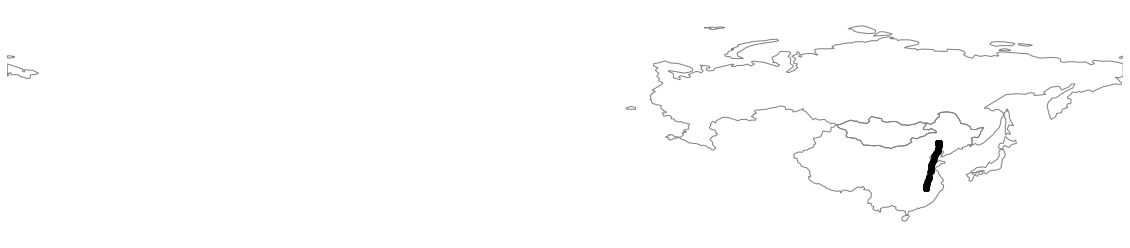

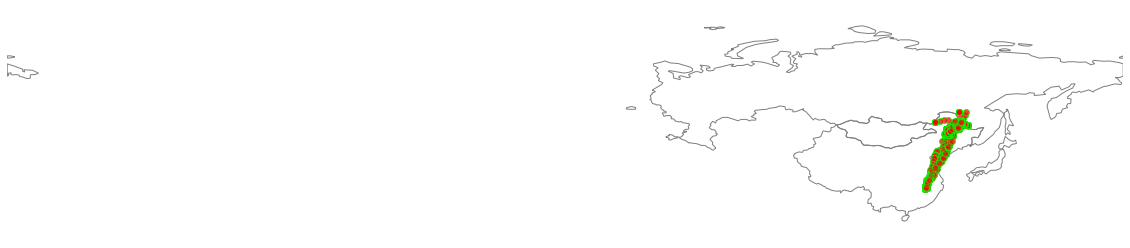

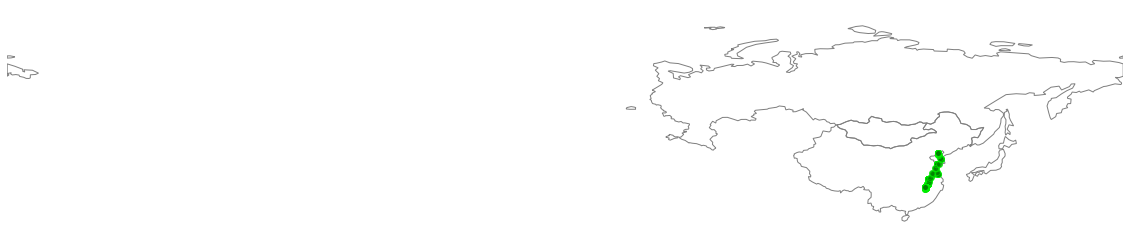

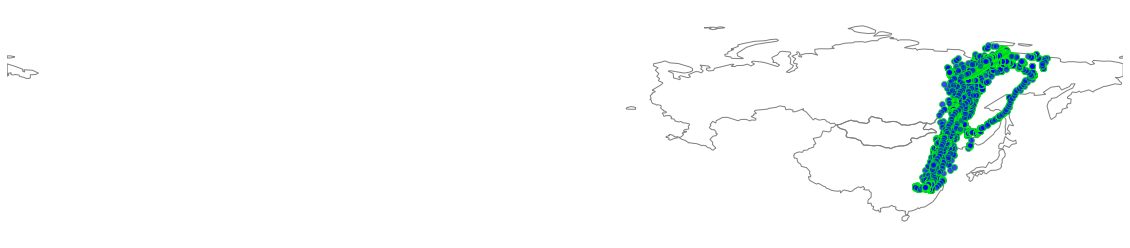

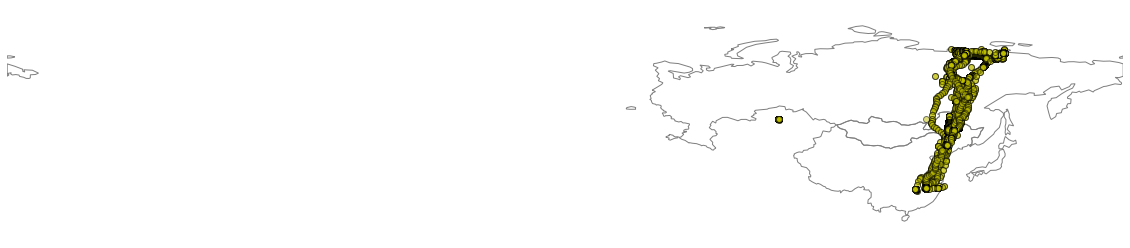

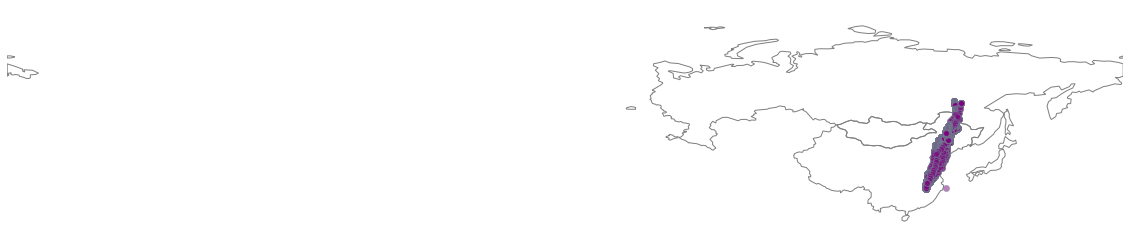

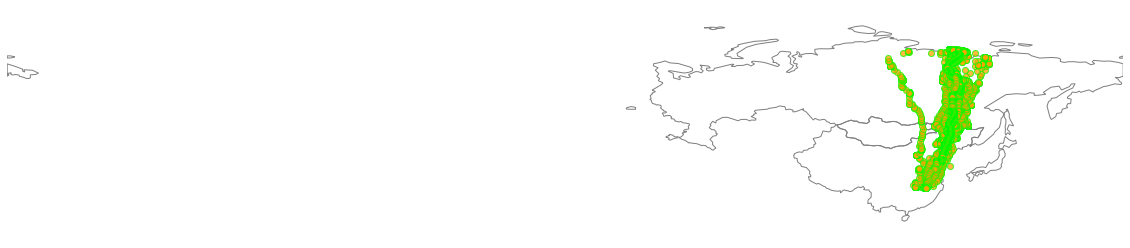

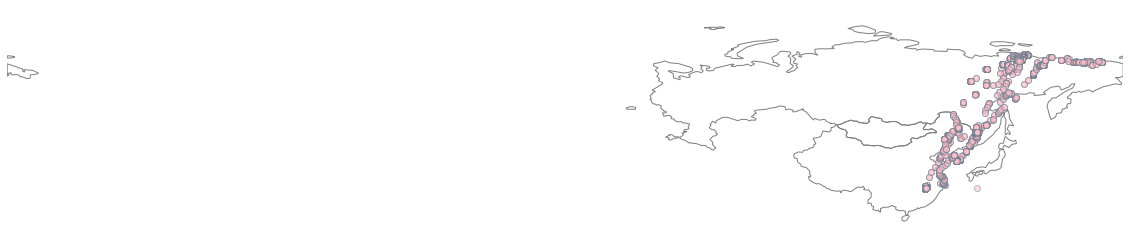

In [7]:
from matplotlib.lines import Line2D
gdf = []
df_all = pd.DataFrame(columns = ['Long', 'Lat'])  
colour = ['k', 'r', 'g', 'b', 'y', 'purple', 'orange', 'pink']
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Fall migration',
                          markerfacecolor='w', markersize=5),
                   Line2D([0], [0], marker='o', color='slategray', label='Spring migration',
                          markerfacecolor='w', markersize=5),
                   Line2D([0], [0], marker='o', color='lime', label='year-round migration',
                          markerfacecolor='w', markersize=5)]
for cluster in range(len(list_of_lists)):
    df = pd.DataFrame(list_of_lists[cluster], columns = ['Long', 'Lat'])  
    df_all.append(df)
    # print dataframe.  
    gdf = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(x=df.Long, y=df.Lat))
    
    #gdf = geopandas.GeoDataFrame(geometry=df_First_last.First[cluster]geopandas.points_from_xy(x=df_First_last.First[cluster][0], y=df_First_last.First[cluster][1]))
    
    
    #ax = gdf.plot(figsize=(20, 15), alpha=0.3, edgecolor='k')
    #asia.plot(ax=ax)
    if(df_First_last['First'][cluster][1]>35 and df_First_last['Last'][cluster][1] < 33):
        ax = gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='black', color= colour[cluster])
    elif(df_First_last['First'][cluster][1]<35 and df_First_last['Last'][cluster][1] > 33):
        ax = gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='slategray', color= colour[cluster])
    else:
        ax = gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='lime', color= colour[cluster])
    #ax.legend(handles=legend_elements, loc=4)
    figure_name = "SSPD_cluster{}.png".format(cluster)
    #geoplot.polyplot(asia, edgecolor='gray', ax=ax)
    fig = geoplot.polyplot(asia, edgecolor='gray', ax=ax).get_figure()
    fig.savefig(figure_name)

Code that will make an average trajectory for all the clusters

In [24]:
traj_number = 0
last_long = 0
last_lat = 0
time_stamp = 0
for index, row in df.iterrows():
    if (last_long > row['Long']+8 or last_lat > row['Lat']+3):
        traj_number = traj_number + 1
        time_stamp = 0
    if (last_long < row['Long']+0.5 and last_lat < row['Lat']+0.5):
        df.loc[index, 'traj_number'] = traj_number
        df.loc[index, 'ts'] = time_stamp
        last_long = row['Long']
        last_lat = row['Lat']
    else:
        df.loc[index, 'traj_number'] = traj_number
        df.loc[index, 'ts'] = time_stamp
        last_long = row['Long']
        last_lat = row['Lat']
        time_stamp = time_stamp + 1
df_mean = df.groupby('ts').mean()

In [25]:
twod_list = []             
for i in range (0, 90):                               
    twod_list.append([])  
print(twod_list)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [26]:
import math
'''for index, row in df.iterrows():
    if(math.isnan(row['Lat']) == False):
        lat_mean_lst[int(row['Lat'])].append(row['Lat'])
    if(math.isnan(row['Long']) == False):
        long_mean_lst[int(row['Long'])].append(row['Long'])
'''
for index, row in df.iterrows():
    if(math.isnan(row['Lat']) == False):
        if(math.isnan(row['Long']) == False):
            twod_list[int(row['Lat'])].append(row['Long'])
for i in range (0, 90):  
    if(len(twod_list[i]) > 0):
        twod_list[i] = sum(twod_list[i])/len(twod_list[i])
    else:
        twod_list[i] = 0
df_mean = pd.DataFrame(columns=['mean_lat', 'mean_long'])
for i in range (0, 90):  
    if(twod_list[i] != 0):
        print(twod_list[i])
        df_mean.loc[len(df_mean)] = [i,twod_list[i]]

116.29455809786334
116.34508847457623
121.97193166666673
122.22811800000002
121.019391
120.79694765258223
120.15046400000001
120.59706333333332
122.78168
126.39441897314374
127.2422150994319
125.37071864864863
127.36043615384617
122.08056666666668
130.4093149146109
129.22721125
122.42044860724232
130.2493695673672
131.8280292679459
132.00091906976746
127.04621829268295
134.71138272727273
129.79092999999997
133.91066
128.4197175
139.03297
138.125405
138.00919666666667
133.63342
144.48792666666665
140.75733333333335
139.30099479999998
142.119805
141.95532
139.05949882352942
131.6475311111111
138.29751000000002
150.47747396825397
143.5351717647059
139.7082842857143
148.5766596634614
167.92614528409098
146.55148836886983
146.04062006179186
148.42560512987018


    mean_lat   mean_long
0       28.0  116.294558
1       29.0  116.345088
2       30.0  121.971932
3       31.0  122.228118
4       32.0  121.019391
5       33.0  120.796948
6       34.0  120.150464
7       35.0  120.597063
8       36.0  122.781680
9       37.0  126.394419
10      38.0  127.242215
11      39.0  125.370719
12      40.0  127.360436
13      41.0  122.080567
14      42.0  130.409315
15      43.0  129.227211
16      44.0  122.420449
17      45.0  130.249370
18      46.0  131.828029
19      47.0  132.000919
20      48.0  127.046218
21      49.0  134.711383
22      50.0  129.790930
23      51.0  133.910660
24      52.0  128.419717
25      53.0  139.032970
26      54.0  138.125405
27      55.0  138.009197
28      56.0  133.633420
29      57.0  144.487927
30      58.0  140.757333
31      59.0  139.300995
32      60.0  142.119805
33      61.0  141.955320
34      62.0  139.059499
35      63.0  131.647531
36      64.0  138.297510
37      65.0  150.477474
38      66.0  143.535172


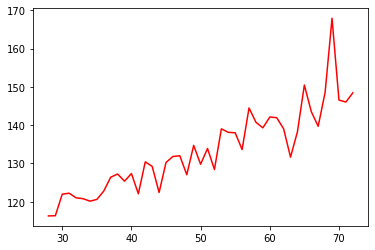

In [27]:
print(df_mean)
plt.plot(df_mean['mean_lat'], df_mean['mean_long'],"r")
plt.show()

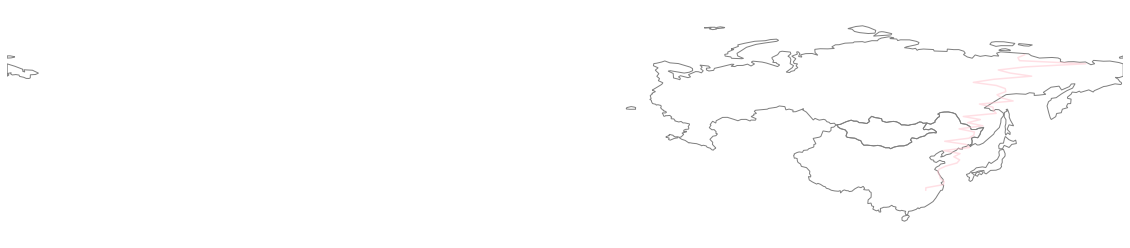

In [28]:
from shapely.geometry import Polygon, LineString
points = geopandas.GeoSeries(map(Point, zip(df_mean['mean_long'], df_mean['mean_lat'])))
line = LineString(points.tolist())
line_gdf = geopandas.GeoDataFrame(geometry=[line])
ax = line_gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='pink')
geoplot.polyplot(asia, edgecolor='gray', ax=ax)

test
116.28932462124995
116.26837702232137
116.72351995
116.9592613
117.29041386666667
117.7602071
117.9392597
117.9639771
118.07672240000002
118.4910356
118.98488130000001
119.24570155
119.95020716666666
120.30140890000001
120.60278244999999
120.58543959495762
test
116.36655777780658
116.2468352462105
116.76019782556641
117.22264230939943
117.5618743255255
117.59116175042729
118.47214464000001
119.14503815999998
119.19009016857142
120.2130899
120.37064099333332
119.93152843684214
120.6296930857143
122.10294759572655
123.42535578431372
122.75900121131792
122.73456951555559
122.5658699182814
122.82459267807084
123.83895289069758
126.6953014849714
127.025681342283
127.36201155674256
128.156499
128.1418115
127.12136430769228
test
116.11054337047807
116.23000953216638
116.97204173913042
116.91065767676766
117.92865
119.30487500000002
119.85566999999999
119.46221
119.83132137614675
121.2552575
120.45298
120.27065538461535
test
116.37278723212935
116.14505536843839
117.03612710198979
119.459

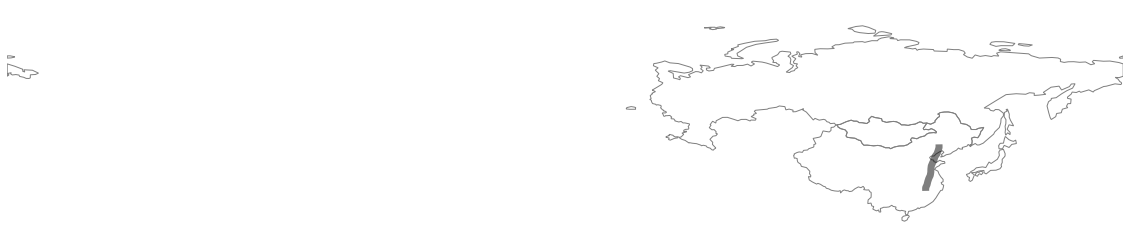

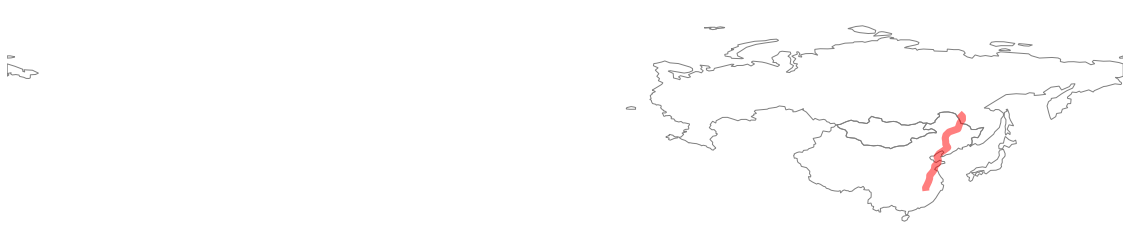

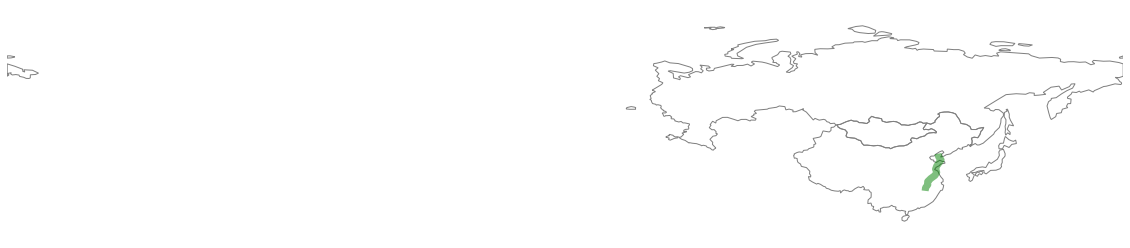

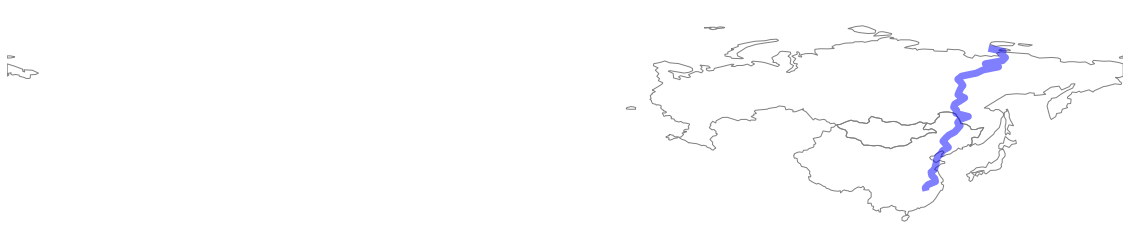

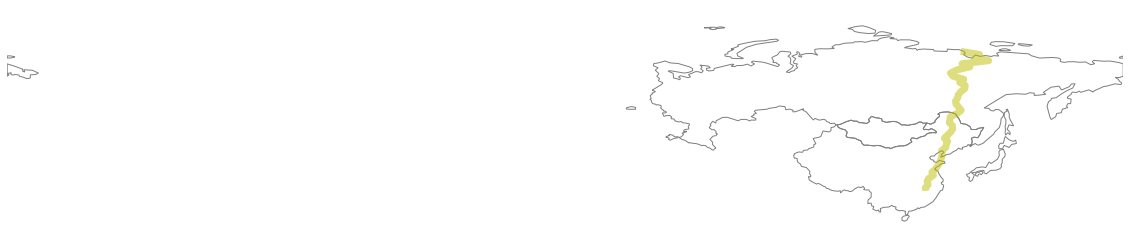

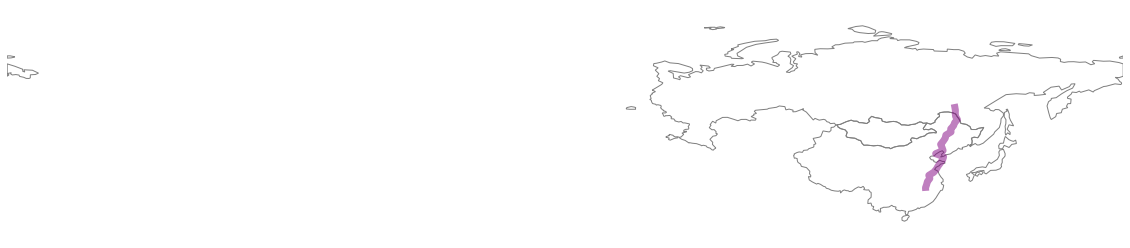

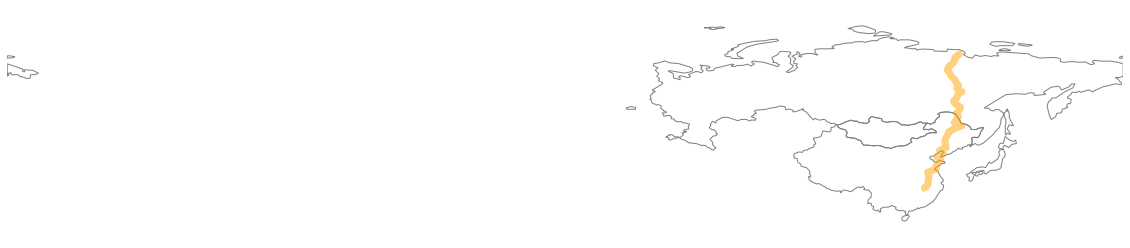

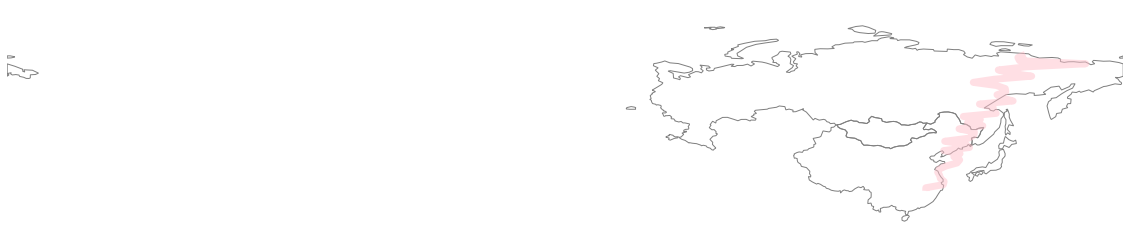

In [33]:
from shapely.geometry import Polygon, LineString
for cluster in range(len(list_of_lists)):
    print("test")
    df = pd.DataFrame(list_of_lists[cluster], columns = ['Long', 'Lat'])  
    
    
    twod_list = []             
    for i in range (0, 90):                              
        twod_list.append([])  
    
    import math
    '''for index, row in df.iterrows():
        if(math.isnan(row['Lat']) == False):
            lat_mean_lst[int(row['Lat'])].append(row['Lat'])
        if(math.isnan(row['Long']) == False):
            long_mean_lst[int(row['Long'])].append(row['Long'])
    '''
    for index, row in df.iterrows():
        if(math.isnan(row['Lat']) == False):
            if(math.isnan(row['Long']) == False):
                twod_list[int(row['Lat'])].append(row['Long'])
    for i in range (0, 90):  
        if(len(twod_list[i]) > 0):
            twod_list[i] = sum(twod_list[i])/len(twod_list[i])
        else:
            twod_list[i] = 0
    df_mean = pd.DataFrame(columns=['mean_lat', 'mean_long'])
    for i in range (0, 90):  
        if(twod_list[i] != 0 and twod_list[i] > 100):
            print(twod_list[i])
            df_mean.loc[len(df_mean)] = [i,twod_list[i]]
    
    
    points = geopandas.GeoSeries(map(Point, zip(df_mean['mean_long'], df_mean['mean_lat'])))
    line = LineString(points.tolist())
    line_gdf = geopandas.GeoDataFrame(geometry=[line])
    if(df_First_last['First'][cluster][1]>35 and df_First_last['Last'][cluster][1] < 35):
        ax = line_gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='black', color= colour[cluster], linewidth=7)
    elif(df_First_last['First'][cluster][1]<35 and df_First_last['Last'][cluster][1] > 35):
        ax = line_gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='slategray', color= colour[cluster], linewidth=7)
    else:
        ax = line_gdf.plot(figsize=(20, 15), alpha=0.5, edgecolor='lime', color= colour[cluster], linewidth=7)
    #ax.legend(handles=legend_elements, loc=4)
    figure_name = "SSPD_cluster_average_downsampled{}.png".format(colour[cluster])
    fig = geoplot.polyplot(asia, edgecolor='gray', ax=ax).get_figure()
    #geoplot.polyplot(asia, edgecolor='gray', ax=ax).get_figure()
    fig.savefig(figure_name)
